#### Universidad Technológica de Bolívar
# Simulación Estocástica - Taller 1

- Rojo sirve para densidades y funciones de distibución teóricas (versus empíricas).
- La escala vertical de la función <code>hist</code> coresponde a efectivos. opción <code>normed=True</code> permite obtener una áera total igual a 1
- Empezamos cargando las bibliótecas
- Analisis de sensibilidad

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *
import pyKriging
from pyKriging.krige import kriging
from pyKriging.samplingplan import samplingplan
#from scipy import *

## Simulación de una variable aleatoria uniforme en [0,1].

In [ ]:
X = rand(5,1);  
print(X)            
hist(X);            ## hist no es normalizado 

In [ ]:
N=10**4; 
X=rand(N,1);
print(linspace(0,1,6))                          
hist(X, bins = linspace(0,1,6), normed = True); 
plot( linspace(0.1,0.9,5), [1]*5, 'ro' );       

In [ ]:

N=10**6; X=rand(N,1);
hist(X, bins = linspace(0,1,101), normed = True);
plot([0,1],[1,1],'r')    

## Distribución exponential de parametro 1/2.

Esperanza 2, cf <code>exponential</code>. Para $x > 0$, $f(x) = (1/2)e^{-x/2}$ y $F(x) = 1 - e^{-x/2}$. $F^{-1}(u) = -2 \ln(1 - u)$ donde $1 - U \sim U$.

In [ ]:
N=10**4; U=rand(N,1);
X=-2*log(U);                                          
hist(X, bins = linspace(0,10,51), normed = True); 
xx=linspace(0,10,201);
plot(xx,exp(-xx/2)/2 ,'r')

In [ ]:
X=exponential(2, (N,1));
hist(X, bins = linspace(0,10,51), normed = True); 
plot(xx,exp(-xx/2)/2,'r')

In [ ]:
N = 10**2;
X=exponential(2, (N,1));
X=sorted(X);
plot(X,linspace(1/N,1,N))        
plot(xx,1 - exp(-xx/2),'r')

## Mínimo de dos variables exponentiales.

Si $X, Y \sim \text{Exp}(1/2)$ son independientes, $\min\{X, Y\} \sim \text{Exp}(1)$.

In [ ]:
N = 10**4; X=exponential(2, (N,2));
print(X[0,:])
X=sort(X,axis = 1); 
print(X[0,:])
hist(X[:,0], bins = linspace(0,5,26), normed = True); 
xx=linspace(0,5,101)
plot(xx,exp(-xx),'r')


## Uniforme en $\{0,1,2,\ldots,10\}$.

In [ ]:
N=10**5; X=ceil(10*rand(N,1));
hist(X, bins = linspace(0.5,10.5,11), normed = True);
plot( linspace(1,10,10), [1./10]*10, 'ro' );  

In [ ]:
E=zeros((10,1))

for i in range(N):                              
    E[ int(X[i]) - 1 ] = E[ int(X[i]) - 1 ] + 1  

F = cumsum(E)/N  

for i in range(10):
    plot([i, i+1],[F[i], F[i]], 'b')
    plot([i, i+1],[float(i+1)/10, float(i+1)/10],'r')

## Poisson de parámetro 4. 
$P(X = k) = e^{-4} 4^k/k!$ donde $k \in \mathbb{N}$. $k =i-1$ en el código.

In [ ]:
N=10**4; X=zeros((N,1));
p = zeros((19,1))
for i in range(19):
    p[i] = exp(-4) * 4**(float(i)) / math.factorial(i)

cp = cumsum(p)
cp = append(cp,1)   ## append agrega un elemento al final de la mesa

for i in range(N):
    X[i] = where(rand() < cp)[0][0]   ##where( ... )[0][0] da el primero índice tal que ... es verdad

hist(X, bins = linspace(-0.5,19.5,21), normed = True);
plot( range(19), p, 'ro' );  


## Simulación de la distribución de Poisson con productos de variables uniformes.

$\prod_{j=1}^{K+1} U_j < e^{-5}  \leq \prod_{j=1}^{K} U_j$ define $K$ que sigue $\text{Poi}(5)$.

In [ ]:
N=10**4; K=-ones((N,1));
for i in range(N):
    produit = 1;
    while produit>exp(-5):
        produit = produit*rand(); 
        K[i]=K[i]+1;

hist(K, bins = linspace(-0.5,19.5,21), normed = True);
xx=linspace(0,18,19)
plot( xx, exp(-5)*5**xx / factorial(xx), 'ro' ); 

## Box Muller. 
Vector gausiano. $(X, Y)$. $X^2 + Y^2 \sim \text{Exp}(1/2)$. Algoritmo de generación de la distribución normal desde variables uniformes $U$ y $V$ sin usar $F$ et $F^{-1}$, difícil a calcular

In [ ]:
N=10**5;
X=normal(0, 1, (N,1));
Y=normal(0, 1, (N,1));
plot(X,Y,'.')

In [ ]:
hist(X**2 + Y**2, bins = linspace(0,10,51), normed = True);
xx=linspace(0,10,51); 
plot(xx, exp(-xx/2)/2 ,'r')

In [ ]:
U=rand(N,1); V=pi*rand(N,1);
X = sqrt(-2*log(U)) * cos(V) 
hist(X, bins = linspace(-3,3,31), normed = True);
xx=linspace(-3,3,121); 
plot(xx, exp(-xx**2/2)/(sqrt(2*pi)), 'r')

In [ ]:
x=-log(rand(5000,4));
s=sum(x, axis=1);
for i in range(0, 5000):
    x[i,:]=x[i,:]/s[i]
    px=x[i,0]*0+x[i,1]*0+x[i,2]*1+x[i,3]*1;
    py=x[i,0]*0+x[i,1]*1+x[i,2]*0+x[i,3]*1;
    plot(px,py,'')

In [ ]:
N=10**4;
X1=exponential(1,(N,1));
X2=exponential(1,(N,1));
X3=normal(0,1,(N,1));
Y=X1*X2+X1**2+X1*X2*X3;
hist(Y, bins=linspace(-5,10,51),normed=True);
print(var(Y))
print(time.clock(),time.time())

## SOBOL Factor estimator 

In [4]:
N=10**6;
X1=normal(0,1,(N,1));
X2=exponential(1,(N,1));
X2tilde=exponential(1,(N,1));
X1tilde=normal(0,1,(N,1));
Y=X1+X2**2+X1*X2;
Ytilde1=X1+X2tilde**2+X1*X2tilde;
Ytilde2=X1tilde+X2**2+X1tilde*X2;
C1=cov(transpose(Y),transpose(Ytilde1))
C2=cov(transpose(Y),transpose(Ytilde2))

S1=2*C1[0,1]/(C1[0,0]+C1[1,1]);
S2=2*C2[0,1]/(C2[0,0]+C2[1,1]);

print("S1= ", S1)

print("S2= ", S2)
#El peso de la interaccion es la resta de la suma de los numeradores - la varianza total. La suma total vale 1, 1-S1-S2=S1S2



('S1= ', 0.16044070019732293)
('S2= ', 0.8010378971389539)


## Prueba para 3 factores 

('S1= ', 0.8296345761018273)
('S2= ', 0.028032878564980306)
('S3= ', 0.02785928682986912)
('S12= ', 0.029412531579131446)
('S13= ', 0.029330166983608612)
('S23= ', 0.028101817235508596)


array([14.018989])

<Figure size 3600x3600 with 0 Axes>

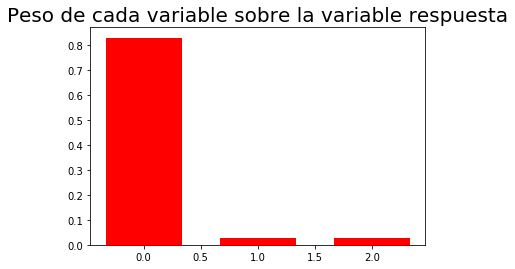

In [5]:
#Example 2 
N=10**6;


X1=exponential(1,(N,1));
X2=exponential(1,(N,1));
X3=normal(0,1,(N,1));
X1t=exponential(1,(N,1));
X2t=exponential(1,(N,1));
X3t=normal(0,1,(N,1));
Y=X1*X2+X1**2+X1*X2*X3;

Yt1=X1*X2t+X1**2+X1*X2t*X3t;
Yt2=X1t*X2+X1t**2+X1t*X2*X3t;
Yt3=X1t*X2t+X1t**2+X1t*X2t*X3;
##Interaccion 1-2
Y12=X1*X2+X1**2+X1*X2*X3t;
##Interaccion 1-3
Y13=X1*X2t+X1**2+X1*X2t*X3;
##Interaccion 2-3
Y23=X1t*X2+X1t**2+X1t*X2*X3;






C1=cov(transpose(Y),transpose(Yt1))
C2=cov(transpose(Y),transpose(Yt2))
C3=cov(transpose(Y),transpose(Yt3))
C12=cov(transpose(Y),transpose(Y12))
C13=cov(transpose(Y),transpose(Y13))
C23=cov(transpose(Y),transpose(Y23))





S1=2*C1[0,1]/(C1[0,0]+C1[1,1]);
S2=2*C2[0,1]/(C2[0,0]+C2[1,1]);
S3=2*C3[0,1]/(C3[0,0]+C3[1,1]);
S12=2*C12[0,1]/(C12[0,0]+C12[1,1])-S1-S2;
S13=2*C13[0,1]/(C13[0,0]+C13[1,1])-S1-S3;
S23=2*C23[0,1]/(C23[0,0]+C23[1,1])-S2-S3;




print("S1= ", S1)

print("S2= ", S2)

print("S3= ", S3)

print("S12= ", S12)

print("S13= ", S13)

print("S23= ", S23)

sum(S1+S2+S3+S12+S13+S23)

figure(figsize=(50,50))
numpy_hist = plt.figure()
y = [S1, S2, S3];
N = len(y);
x = range(N);
width = 1/1.5;
plt.bar(x, y, width, color="red")
title('Peso de cada variable sobre la variable respuesta',fontsize=20)
max(X2)

In [ ]:
sp=samplingplan(2) #Dimension
X=sp.optimallhc(10)#Nube de puntos
#gaussian way to make regression
testfun=pyKriging.testfunctions().branin #Branin --> benchmark
y=testfun(X)

k=kriging(X,y,testfuncion=testfun,name='simple')
k.train()
k.plot()

## Ejemplo carro

('S1= ', 0.998044027440057)
('S2= ', -0.0005844590317639108)
('S3= ', -0.0006628329566749788)
('S12= ', 0.0006014827316284709)
('S13= ', 0.0006584441120067328)
('S23= ', 1.0012472919884388)


array([4.80360895])

<Figure size 3600x3600 with 0 Axes>

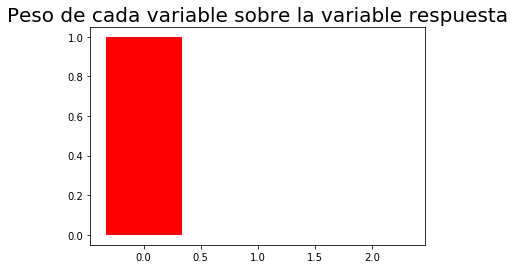

In [3]:
#Example 2 
N=10**6;


X1=normal(0,1,(N,1));
X2=normal(0,1,(N,1));
X3=normal(0,1,(N,1));
X1t=normal(0,1,(N,1));
X2t=normal(0,1,(N,1));
X3t=normal(0,1,(N,1));
Y=X1*1.9*10**4+X2*X3*8.4*10**2+10*X2;


Yt1=X1*1.9*10**4+X2t*X3t*8.4*10**2+10*X2t;
Yt2=X1t*1.9*10**4+X2*X3t*8.4*10**2+10*X2;
Yt3=X1t*1.9*10**4+X2t*X3*8.4*10**2+10*X2t;
##Interaccion 1-2
Y12=X1*1.9*10**4+X2*X3t*8.4*10**2+10*X2;
##Interaccion 1-3
Y13=X1*1.9*10**4+X2t*X3*8.4*10**2+10*X2t;
##Interaccion 2-3
Y23=X1*1.9*10**4+X2*X3*8.4*10**2+10*X2;






C1=cov(transpose(Y),transpose(Yt1))
C2=cov(transpose(Y),transpose(Yt2))
C3=cov(transpose(Y),transpose(Yt3))
C12=cov(transpose(Y),transpose(Y12))
C13=cov(transpose(Y),transpose(Y13))
C23=cov(transpose(Y),transpose(Y23))





S1=2*C1[0,1]/(C1[0,0]+C1[1,1]);
S2=2*C2[0,1]/(C2[0,0]+C2[1,1]);
S3=2*C3[0,1]/(C3[0,0]+C3[1,1]);
S12=2*C12[0,1]/(C12[0,0]+C12[1,1])-S1-S2;
S13=2*C13[0,1]/(C13[0,0]+C13[1,1])-S1-S3;
S23=2*C23[0,1]/(C23[0,0]+C23[1,1])-S2-S3;




print("S1= ", S1)

print("S2= ", S2)

print("S3= ", S3)

print("S12= ", S12)

print("S13= ", S13)

print("S23= ", S23)

sum(S1+S2+S3+S12+S13+S23)

figure(figsize=(50,50))
numpy_hist = plt.figure()
y = [S1, S2, S3];
N = len(y);
x = range(N);
width = 1/1.5;
plt.bar(x, y, width, color="red")
title('Peso de cada variable sobre la variable respuesta',fontsize=20)
max(X2)